# The Spark Foundation: Data Science and Business Analytics Internship

Task4: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

● As a security/defense analyst, try to find out the hot zone of terrorism. 

● What all security issues and insights you can derive by EDA? 

### Author - Soni Mrunaliben

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Import the Dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

C:\Users\Soni Mrunali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# To know the dimension of the dataset
df.shape

(181691, 135)

In [5]:
# renaming columns for easy understanding
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude',
                   'longitude':'Longitude'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# deleting the unnecessary columns
df= df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.shape

(181691, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [10]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
# dropping the Motive columns as it contains more then 70% of missing data
df = df.drop(['Motive'],axis=1)

In [12]:
df.shape

(181691, 18)

In [13]:
# Checking the number of null values in a dataset and the percentage of missing values

# calculating the total null values and arranging in descending order
total = df.isnull().sum().sort_values(ascending=False)

# seeing the percentage of missing values and arrainging it in descending order
percent= (df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False) 

# concatenating total and percent variables
df_missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
df_missing

,Total,Percent
Summary,66129,36.396409
Wounded,16311,8.977330
Killed,10313,5.676120
Longitude,4557,2.508104
Latitude,4556,2.507554
Target,636,0.350045
City,434,0.238867
State,421,0.231712
Month,0,0.000000
Extended,0,0.000000


In [14]:
df.dtypes

Year             int64
Month            int64
Extended         int64
Day              int64
Country         object
State           object
Region          object
City            object
Latitude       float64
Longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
dtype: object

In [15]:
# Imputting the missing values in case of categorical variale by mode 
# and numerical value by median

for x in df.columns:
    if df[x].dtype=='object':
        df[x].fillna(df[x].mode()[0],inplace=True)
    elif df[x].dtype=='float64' or df[x].dtype == 'int64':
        df[x].fillna(df[x].median(),inplace=True)

In [16]:
df.isnull().sum()

Year           0
Month          0
Extended       0
Day            0
Country        0
State          0
Region         0
City           0
Latitude       0
Longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

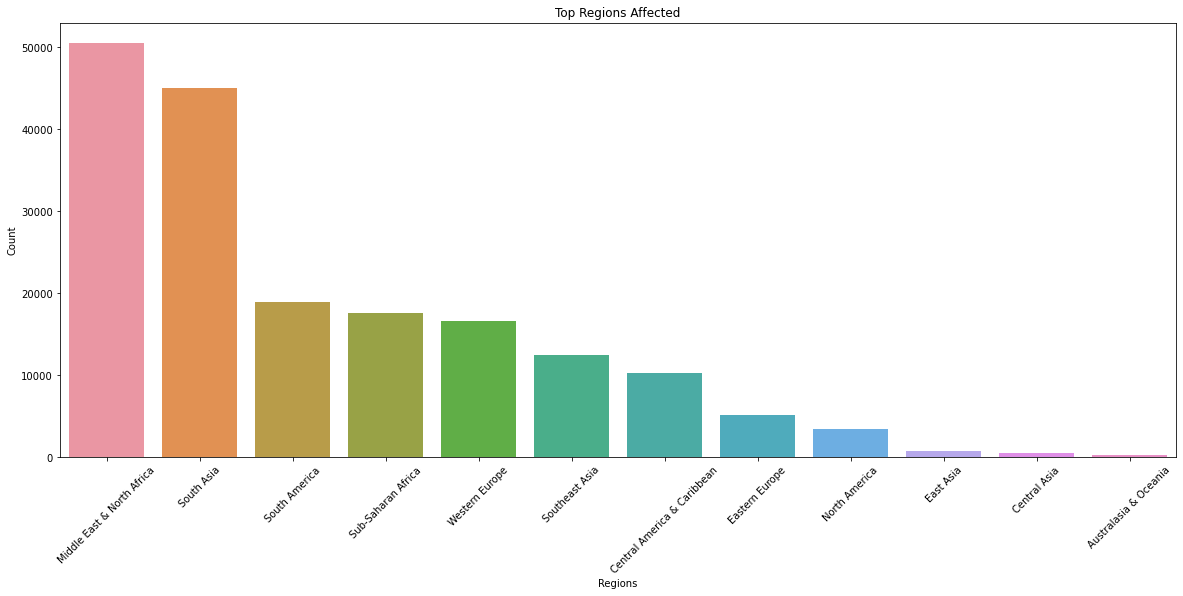

In [17]:
# Region with most terrorist attack
plt.figure(figsize = (20,8))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values)
plt.title('Top Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

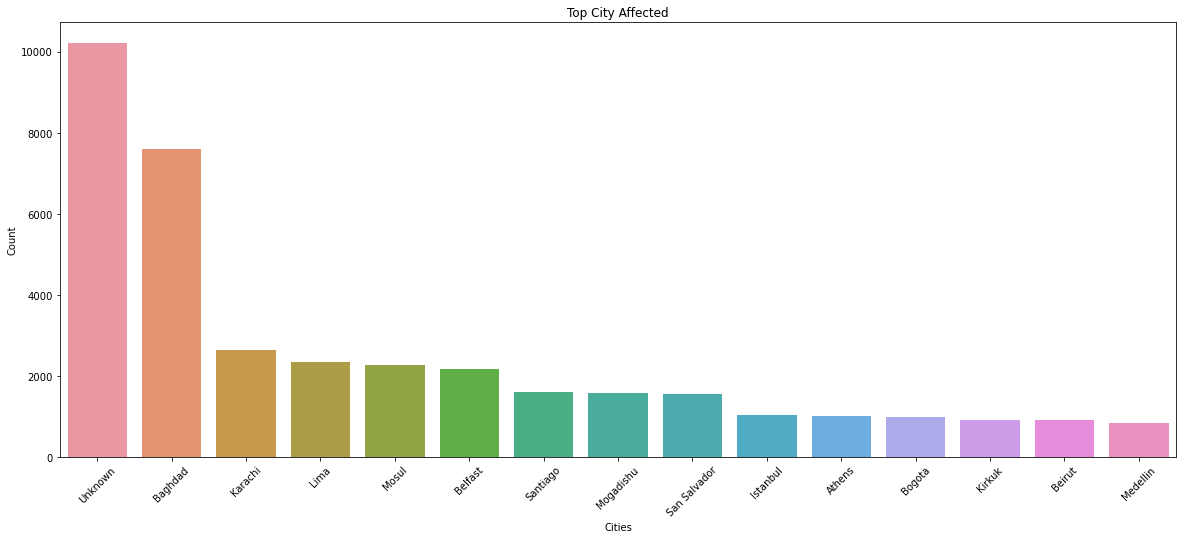

In [18]:
# city wise most trrorist attack

plt.figure(figsize = (20,8))
sns.barplot(df['City'].value_counts()[:15].index,df['City'].value_counts()[:15].values)
plt.title('Top City Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

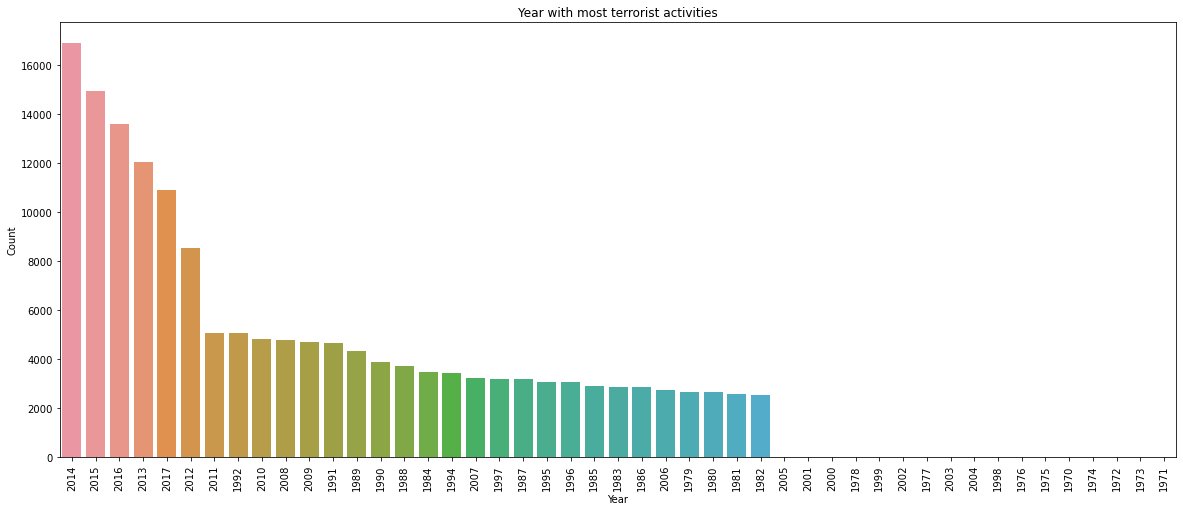

In [19]:
# Year wise most terrorist attack

plt.figure(figsize = (20,8))
sns.barplot(df['Year'].value_counts()[:30].index,df['Year'].value_counts()[:30].values, 
           order = df['Year'].value_counts().index)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

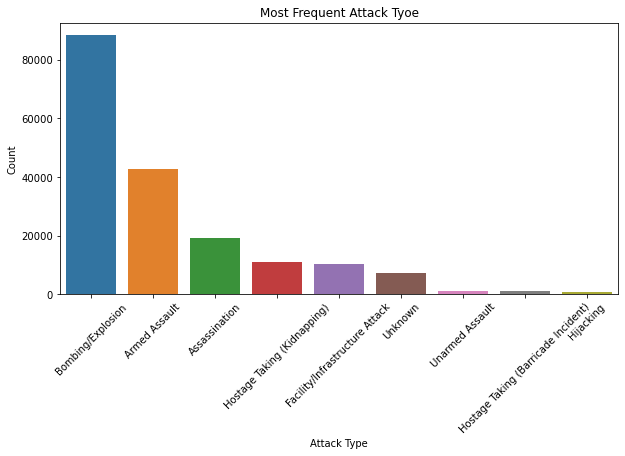

In [20]:
# Most frequent attack type
plt.figure(figsize = (10,5))
sns.barplot(df['AttackType'].value_counts()[:15].index,df['AttackType'].value_counts()[:15].values)
plt.title('Most Frequent Attack Tyoe')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()


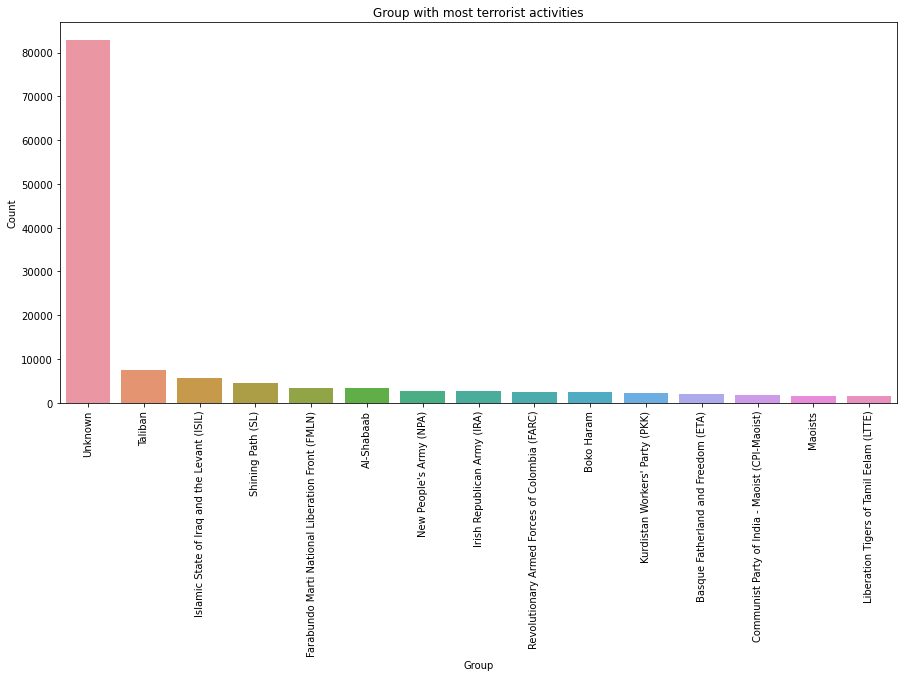

In [21]:
#Most Frequent Groups invovled in past terrorist activity

plt.figure(figsize = (15,7))
sns.barplot(df['Group'].value_counts()[:15].index,df['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

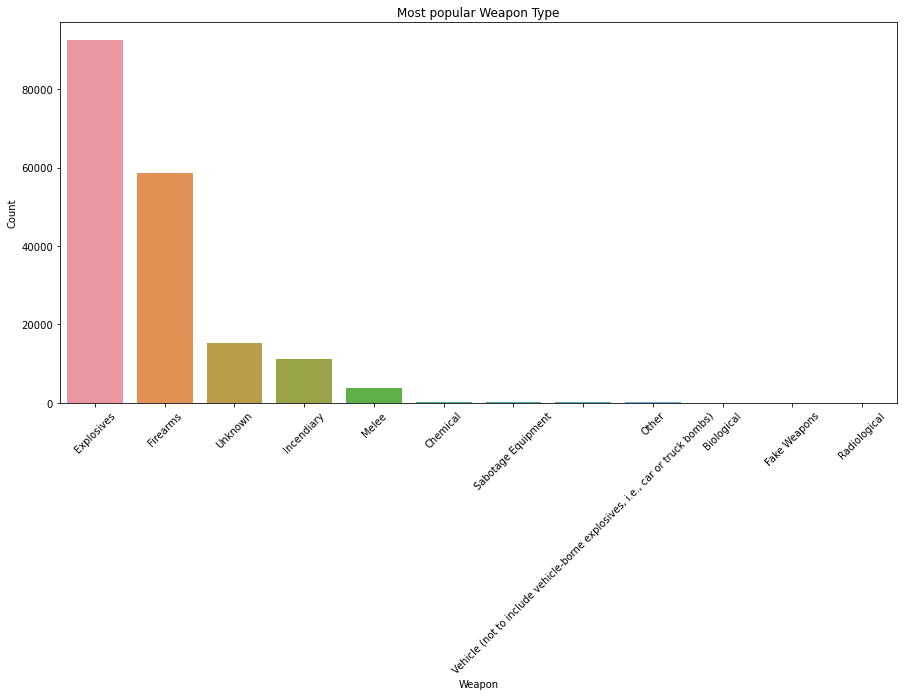

In [22]:
plt.figure(figsize = (15,7))
sns.barplot(df['Weapon_type'].value_counts()[:15].index,df['Weapon_type'].value_counts()[:15].values)
plt.title('Most popular Weapon Type')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()